In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import kornia as K
from lightglue import ALIKED

from src.utils.utils import load_torch_image

In [3]:
device = K.utils.get_cuda_device_if_available(0)
print(device)

DEBUG = len([p for p in Path("/kaggle/input/image-matching-challenge-2024/test/").iterdir() if p.is_dir()]) == 1
print("DEBUG:", DEBUG)

cuda:0
DEBUG: True


Downloading: "https://github.com/Shiaoming/ALIKED/raw/main/models/aliked-n16.pth" to /root/.cache/torch/hub/checkpoints/aliked-n16.pth


100%|██████████| 2.61M/2.61M [00:00<00:00, 43.1MB/s]


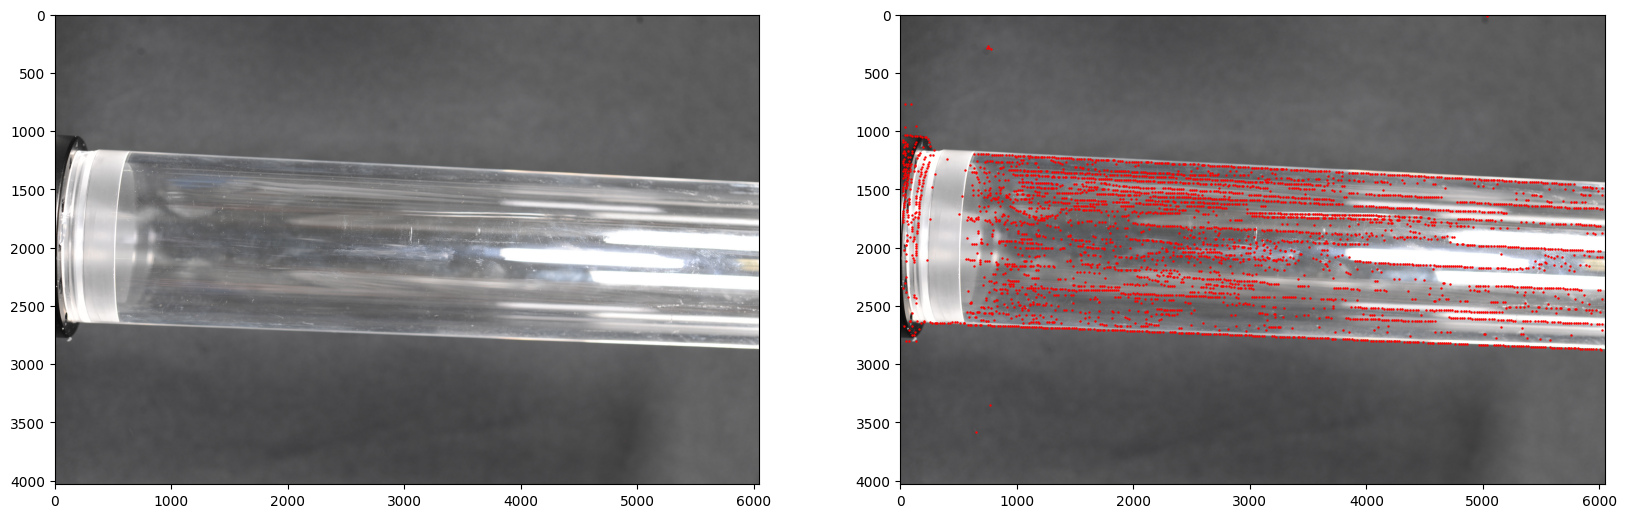

In [4]:
dtype = torch.float32  # ALIKED has issues with float16

extractor = ALIKED(max_num_keypoints=4096, detection_threshold=0.01, resize=1024).eval().to(device, dtype)

path = "/kaggle/input/image-matching-challenge-2024/train/transp_obj_glass_cylinder/images/dsc_8232.png"
image = K.io.load_image(path, K.io.ImageLoadType.RGB32, device=device)[None, ...].to(dtype)
features = extractor.extract(image)  # shape: [1, num_keypoints, 2]

fig, ax = plt.subplots(1, 2, figsize=(20, 40))
ax[0].imshow(image[0, ...].permute(1, 2, 0).cpu())
ax[1].imshow(image[0, ...].permute(1, 2, 0).cpu())
ax[1].scatter(features["keypoints"][0, :, 0].cpu(), features["keypoints"][0, :, 1].cpu(), s=0.5, c="red")

del extractor